<h1>Importacion de librerias necesarias para el desarrollo del modelo</h1>

In [1]:
# Manipulacion de datos
import pandas as pd
import numpy as np

#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocesamiento
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

#Estilo de las graficas
sns.set_style('whitegrid')

In [2]:
# Carga de datos
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# Tamaño del dataset
df.shape

(32581, 12)

In [4]:
#informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
#conteo de valores nulos
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
#Eliminar filas con valores nulos y verificar
df = df.dropna()
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
#conteo de valores unicos
df.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [8]:
#Estadisticos descriptivos para variables numericas
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
#Estadisticos descriptivos para variables categoricas
df.describe(include=['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,28638,28638,28638,28638
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,14551,5704,9402,23535


In [10]:
#Verificar si hay valores duplicados
df.duplicated().sum()

137

In [11]:
#Eliminar valores duplicados
df.drop_duplicates(inplace=True)

In [12]:
#Verificar que se eliminaron los valores duplicados
df.shape

(28501, 12)

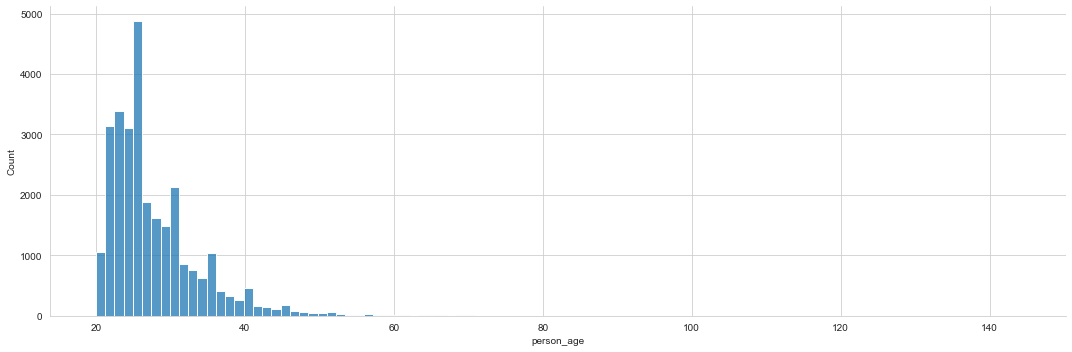

In [13]:
#Grafico de la variable person_age para ver su distribucion
sns.displot(df['person_age'], kde=False, bins=100, aspect=3)
plt.show()

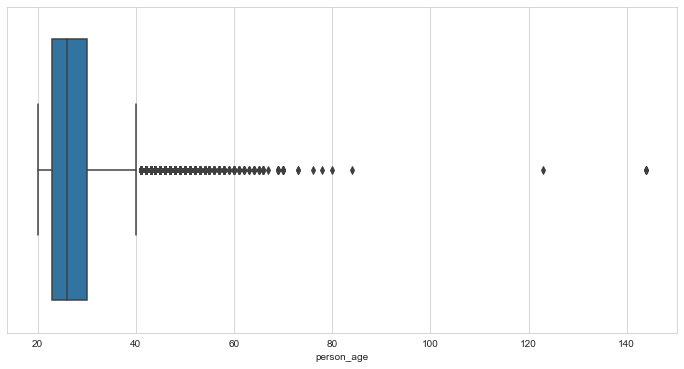

In [14]:
#Grafico de caja de la variable person_age para verificar outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['person_age'])
plt.show()

### En el grafico no se observan datos erroneos relacionados con la edad (0 < o > 100 años). En la tabla relacionada a los estadisticos descriptivos se observa un valor maximo de 144 para la variable graficada lo cual es un valor incorrecto y que debe ser corregido. Ademas en el boxplot se puede verificar la existencia de datos outliers.

In [15]:
#Verificar cuantas entradas de la variable person_age son mayores a 100
df[df['person_age'] > 100]['person_age'].count()

4

In [16]:
#eliminar las entradas de la variable person_age mayores a 100
df = df[df['person_age'] <= 100]

### El mismo proceso se realiza para la variable person_emp_length

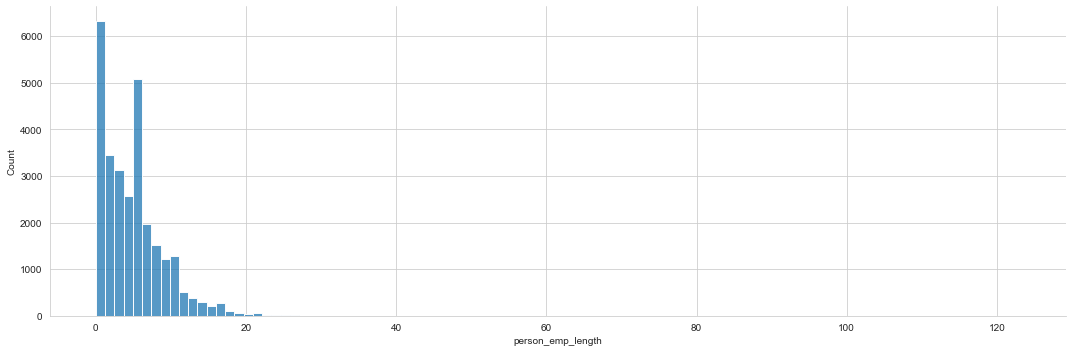

In [17]:
#Grafico de la variable person_emp_length para ver su distribucion
sns.displot(df['person_emp_length'], kde=False, bins=100, aspect=3)
plt.show()

In [18]:
#Verificar cuantas entradas de la variable person_emp_length son mayores a 40
df[df['person_emp_length'] > 40]['person_emp_length'].count()

3

In [19]:
#eliminar las entradas de la variable person_emp_length mayores a 40
df = df[df['person_emp_length'] <= 40]

### Se procede a convertir las variables categoricas en numericas para ser aceptadas por el modelo, unas se hacen mediante target dummy (datos nominales) y otras se establecen los valores en la misma columna (datos ordinales). Ejemplo: 

<div>
  <table style="margin: 0 auto;">
    <tr>
      <th>Variable_Categorica</th>
      <th>Variable_Numerica</th>
    </tr>
    <tr>
      <td>A</td>
      <td>0</td>
    </tr>
    <tr>
      <td>B</td>
      <td>1</td>
    </tr>
    <tr>
      <td>C</td>
      <td>2</td>
    </tr>
    <tr>
      <td>D</td>
      <td>3</td>
    </tr>
    <tr>
      <td>E</td>
      <td>4</td>
    </tr>
  </table>
</div>

## Datos Ordinales:

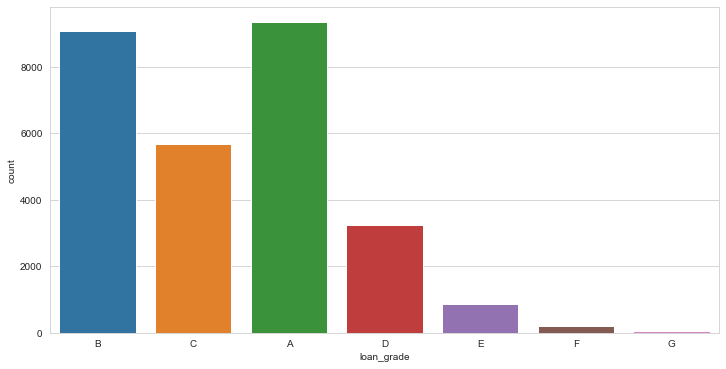

In [20]:
#Grafico de la variable loan_grade para ver el conteo de cada categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='loan_grade')
plt.show()

## NOTA: Preguntar acerca de esta codificacion, ya que con esto asumimos que A es mejor que B, y B es mejor que C y se encuentran equi distantes entre si 

In [21]:
#convertir variable categorica loan_grade a numerica
df['loan_grade'].replace(to_replace=['A', 'B', 'C', 'D', 'E', 'F', 'G'], value=[6, 5, 4, 3, 2, 1, 0], inplace=True)

In [22]:
#verificar que se convirtio la variable loan_grade a numerica
df['loan_grade'].dtype

dtype('int64')

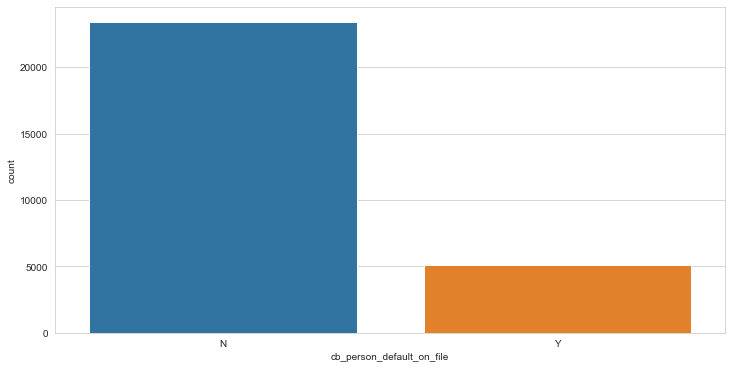

In [23]:
#Grafico de la variable cb_person_default_on_file para ver el conteo de cada categoria
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df, x='cb_person_default_on_file')
plt.show()

In [24]:
#convertir variable categorica cb_person_default_on_file a numerica
df['cb_person_default_on_file'].replace(to_replace=['Y', 'N'], value=[1, 0], inplace=True)

In [25]:
#verificar que se convirtio la variable cb_person_default_on_file a numerica
df['cb_person_default_on_file'].dtype

dtype('int64')

In [26]:
#Ver contenido del dataset con estas modificaciones
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,5,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,MEDICAL,4,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,MEDICAL,4,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,MEDICAL,4,35000,14.27,1,0.55,1,4
5,21,9900,OWN,2.0,VENTURE,6,2500,7.14,1,0.25,0,2


## Datos nominales

person_home_ownership
loan_intent

In [27]:
#Crear codificacion nominal para las variables person_home_ownership, loan_intent
codificador = OneHotEncoder(sparse=False)
codificador.fit_transform(df[['person_home_ownership', 'loan_intent']])

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [28]:
#Crear dataframe con las variables codificadas
df_codificado = pd.DataFrame(codificador.fit_transform(df[['person_home_ownership', 'loan_intent']]), columns=np.concatenate(codificador.categories_))
df_codificado.head()

,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
#Unir el dataframe codificado con el dataframe original y eliminar las variables person_home_ownership, loan_intent
df = pd.concat([df, df_codificado], axis=1)
df.drop(['person_home_ownership', 'loan_intent'], axis=1, inplace=True)
df.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
1,21.0,9600.0,5.0,5.0,1000.0,11.14,0.0,0.10,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,25.0,9600.0,1.0,4.0,5500.0,12.87,1.0,0.57,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,65500.0,4.0,4.0,35000.0,15.23,1.0,0.53,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,54400.0,8.0,4.0,35000.0,14.27,1.0,0.55,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,21.0,9900.0,2.0,6.0,2500.0,7.14,1.0,0.25,0.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
#Analisis de la variable objetivo
df['loan_status'].value_counts()

0.0    22307
1.0     6187
Name: loan_status, dtype: int64

In [33]:
df.reset_index(inplace = True)

In [35]:
df.isnull().sum()

index                            0
person_age                    3535
person_income                 3535
person_emp_length             3535
loan_grade                    3535
loan_amnt                     3535
loan_int_rate                 3535
loan_status                   3535
loan_percent_income           3535
cb_person_default_on_file     3535
cb_person_cred_hist_length    3535
MORTGAGE                      3535
OTHER                         3535
OWN                           3535
RENT                          3535
DEBTCONSOLIDATION             3535
EDUCATION                     3535
HOMEIMPROVEMENT               3535
MEDICAL                       3535
PERSONAL                      3535
VENTURE                       3535
dtype: int64

In [36]:
df = df.dropna()
df.isnull().sum()

index                         0
person_age                    0
person_income                 0
person_emp_length             0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
MORTGAGE                      0
OTHER                         0
OWN                           0
RENT                          0
DEBTCONSOLIDATION             0
EDUCATION                     0
HOMEIMPROVEMENT               0
MEDICAL                       0
PERSONAL                      0
VENTURE                       0
dtype: int64

In [48]:
df.head()

,index,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,...,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,1,21.0,9600.0,5.0,5.0,1000.0,11.14,0.0,0.10,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,25.0,9600.0,1.0,4.0,5500.0,12.87,1.0,0.57,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,23.0,65500.0,4.0,4.0,35000.0,15.23,1.0,0.53,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,24.0,54400.0,8.0,4.0,35000.0,14.27,1.0,0.55,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,21.0,9900.0,2.0,6.0,2500.0,7.14,1.0,0.25,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:

#
# Variables independiente y dependiente
X = df.drop(columns=['loan_status'])
y = df[['loan_status']]

# Modelo de regresión logística y su ajuste
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Parametros del modelo
print(clf_logistic_single.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [38]:

# Interceptos del modelo
print(clf_logistic_single.intercept_)

[-3.06856216e-09]


In [39]:
X = df.loc[:,['loan_int_rate','person_emp_length','person_income']]
y = df[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Ajuste del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Coeficientes del modelo
print(clf_logistic.coef_)

[[ 2.94951332e-01 -1.55003521e-02 -2.14152752e-05]]


In [40]:
# Conjutos de datos numéricos y no numéricos
#cred_num = df.select_dtypes(exclude=['object'])
#cred_str = df.select_dtypes(include=['object'])

# Codificación dummie al conjunto de variables categóricas
#cred_str_onehot = pd.get_dummies(cred_str)

# Unión de las variables numéricas con las codificadas
#cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Lista de columnas del nuevo cnjunto de datos
#print(cr_loan_prep.columns)

ValueError: No objects to concatenate

In [41]:
# Variables independientes y dependiente
X = df.loc[:,df.columns != 'loan_status']
y = df[['loan_status']]

# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Entrenamiento del modelo de regresión logística
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Predicciones de probabilidad para el estado del préstamo usando datos de prueba
preds = clf_logistic.predict_proba(X_test)

# Marcos de datos de las primeras cinco predicciones y las primeras cinco etiquetas verdaderas
preds_df = pd.DataFrame(preds[:,1][0:20], columns = ['prob_default'])
true_df = y_test.head(20)

# Comparación de los dos marcos de datos
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

    loan_status  prob_default
0           0.0      0.049076
1           1.0      0.574603
2           0.0      0.008844
3           0.0      0.105305
4           0.0      0.199228
5           0.0      0.073799
6           0.0      0.194183
7           0.0      0.021863
8           0.0      0.102445
9           0.0      0.264661
10          0.0      0.124145
11          0.0      0.283286
12          0.0      0.514518
13          0.0      0.061719
14          0.0      0.126028
15          0.0      0.096556
16          0.0      0.082975
17          0.0      0.004569
18          0.0      0.116992
19          0.0      0.197951


In [42]:
# Dataframe de las probabilidades de incumplimiento
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Estado del préstamo según la probabilidad asignada
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda X: 1 if X > .5 else 0)

# Recuento de filas para cada estado de préstamo
print(preds_df['loan_status'].value_counts())

0    8947
1    1037
Name: loan_status, dtype: int64


In [43]:
# Reporte de clasificación
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.83      0.96      0.89      7765
     Default       0.70      0.33      0.45      2219

    accuracy                           0.82      9984
   macro avg       0.77      0.64      0.67      9984
weighted avg       0.80      0.82      0.79      9984



In [44]:
# Valores no promedio del informe
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.83301665, 0.69913211]), array([0.9598197 , 0.32672375]), array([0.89193394, 0.4453317 ]), array([7765, 2219], dtype=int64))


In [45]:
# Dos primeros números del informe
print(precision_recall_fscore_support(y_test,preds_df['loan_status'])[0:2])

(array([0.83301665, 0.69913211]), array([0.9598197 , 0.32672375]))


In [46]:
# Predicciones para la probabilidad de incumplimiento
preds = clf_logistic.predict_proba(X_test)

# Puntuación de precisión del modelo
print(clf_logistic.score(X_test, y_test))

0.8191105769230769


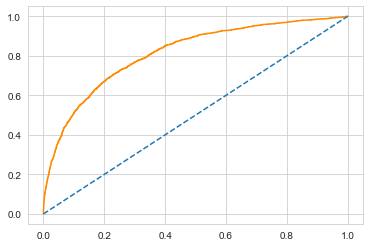

In [47]:
# Gáfico de la curva ROC de las probabilidades de incumplimiento
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()